In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

# Survived

In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

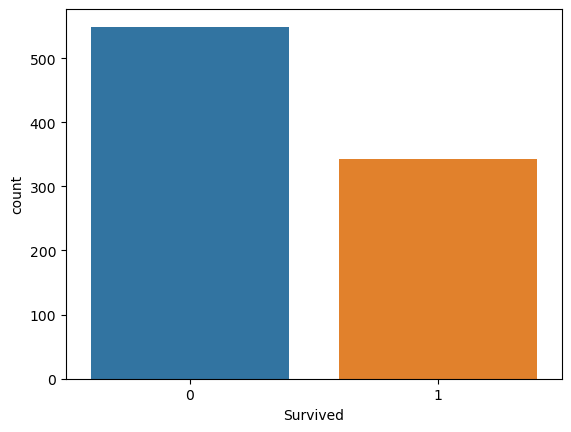

In [9]:
sns.countplot(df.Survived)

# PassengerId

In [10]:
df.PassengerId.value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

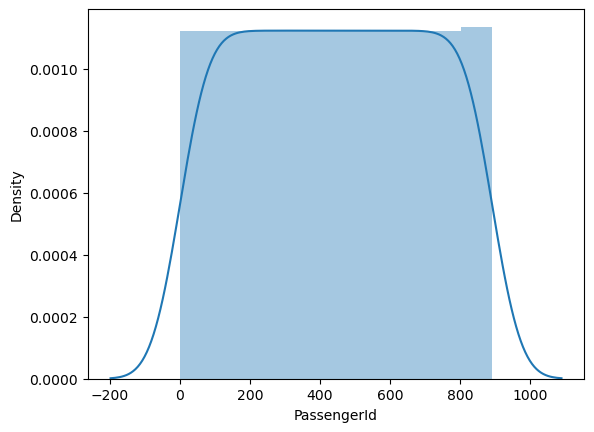

In [11]:
sns.distplot(df.PassengerId)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PassengerId'>

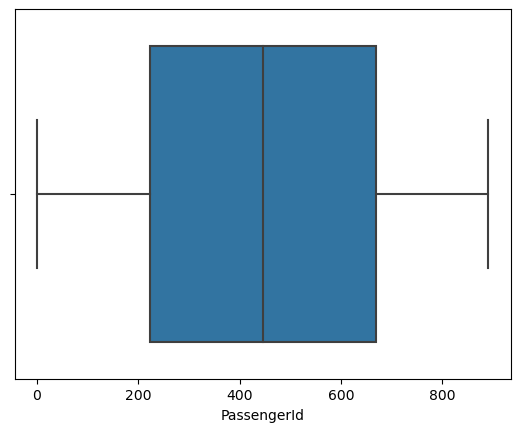

In [12]:
sns.boxplot(df.PassengerId)

# Pclass

In [13]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

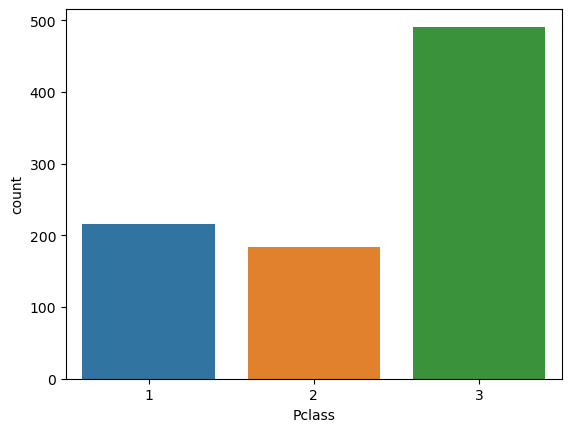

In [14]:
sns.countplot(df.Pclass)

In [15]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Sex

In [16]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

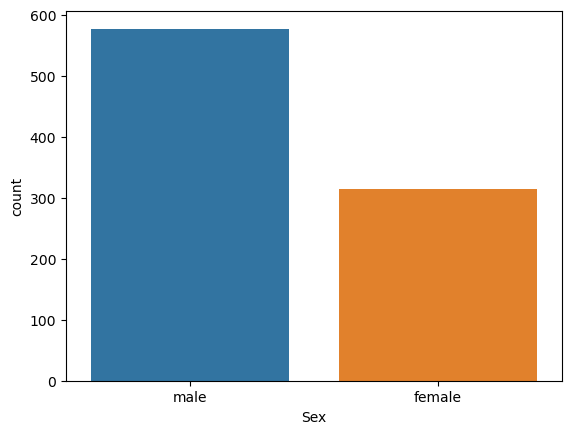

In [17]:
sns.countplot(df.Sex)

In [18]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Age	

In [19]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [20]:
a=df.Age.median()
a

28.0

In [21]:
df.Age.fillna(a,inplace=True)

In [22]:
df.Age.isnull().sum()

0

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

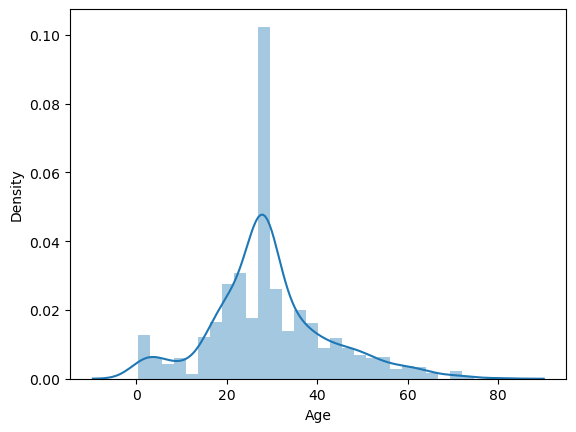

In [23]:
sns.distplot(df.Age)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

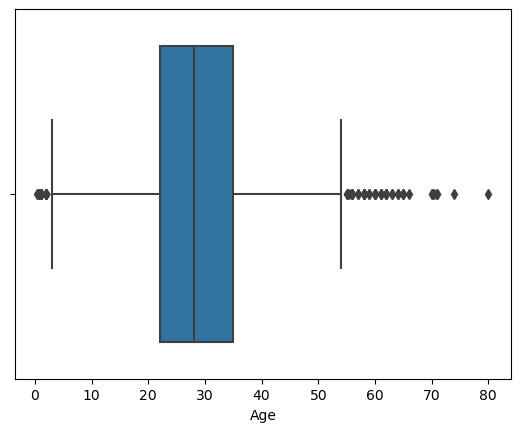

In [24]:
sns.boxplot(df.Age)

In [25]:
q3=df.Age.quantile(0.75)
q1=df.Age.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q3-(1.5*iqr)

In [26]:
df.Age=np.where(df.Age>upper,upper,df.Age)
df.Age=np.where(df.Age<lower,upper,df.Age)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

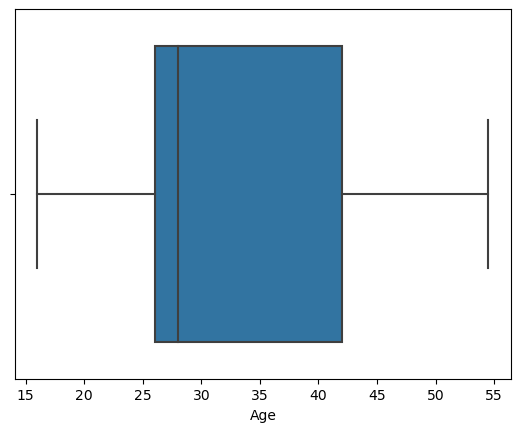

In [27]:
sns.boxplot(df.Age)

# SibSp

In [28]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

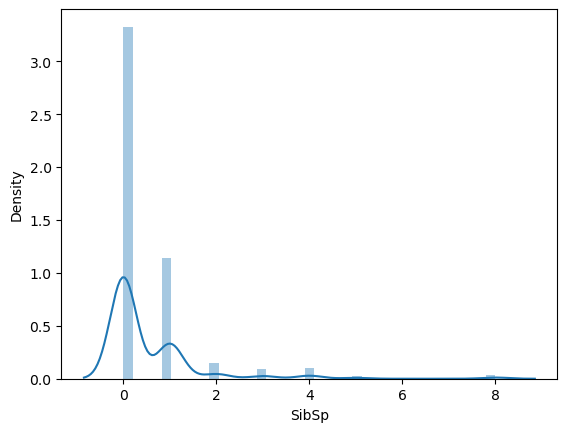

In [29]:
sns.distplot(df.SibSp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

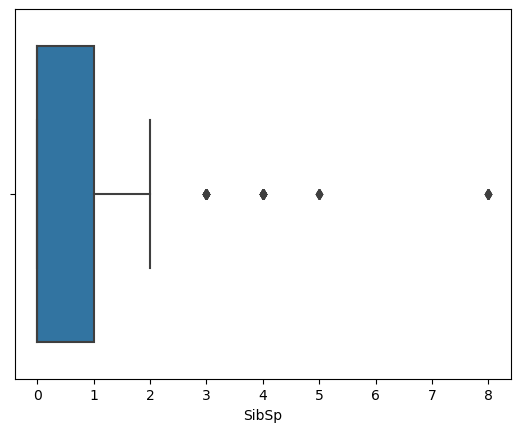

In [30]:
sns.boxplot(df.SibSp)

In [31]:
q3=df.SibSp.quantile(0.75)
q1=df.SibSp.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)


In [32]:
df.SibSp=np.where(df.SibSp>upper,upper,df.SibSp)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

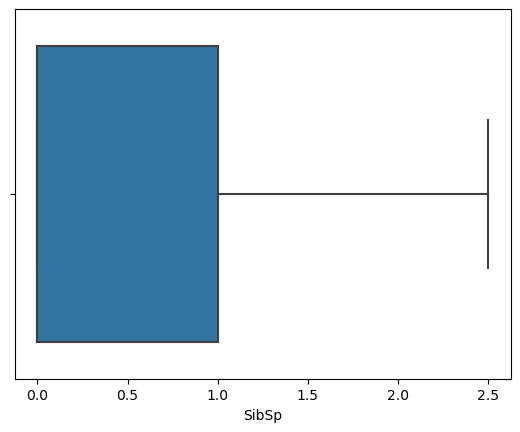

In [33]:
sns.boxplot(df.SibSp)

In [34]:
df[['SibSp','Survived']].groupby(["SibSp"],as_index= False).mean().sort_values(by= 'Survived',ascending = False)

,SibSp,Survived
1,1.0,0.535885
2,2.0,0.464286
0,0.0,0.345395
3,2.5,0.152174


# Parch

In [35]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

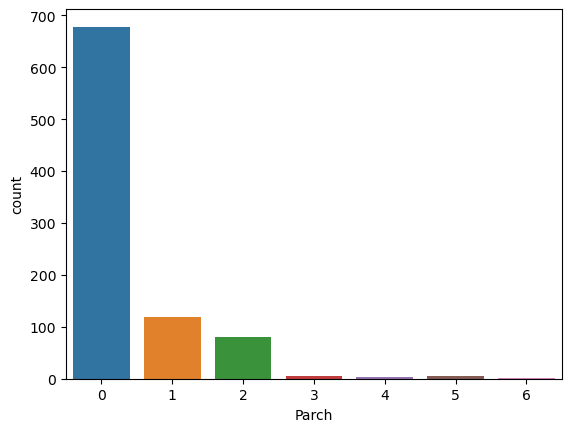

In [36]:
sns.countplot(df.Parch)

In [37]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Ticket

In [38]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [39]:
df.drop('Ticket',axis=1,inplace=True)

# Fare

In [40]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

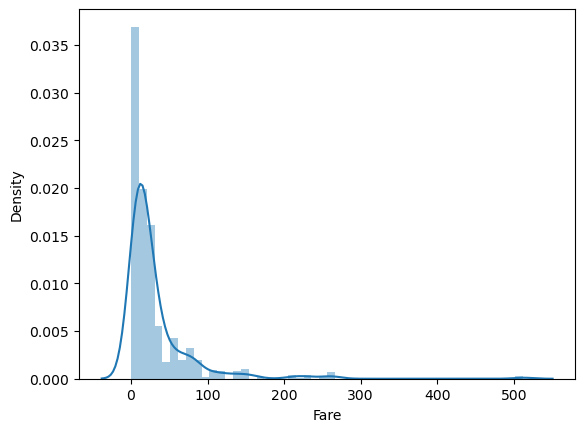

In [41]:
sns.distplot(df.Fare)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

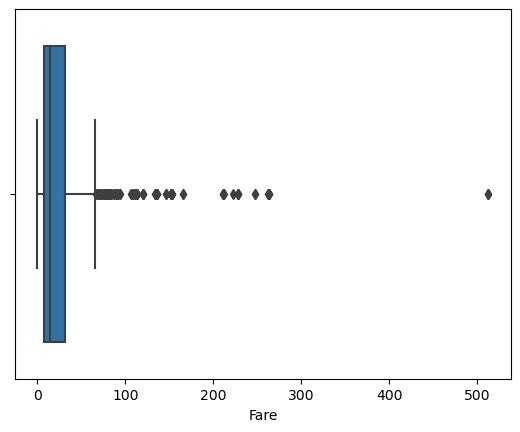

In [42]:
sns.boxplot(df.Fare)

In [43]:
q3=df.Fare.quantile(0.75)
q1=df.Fare.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)


In [44]:
df.Fare=np.where(df.Fare>upper,upper,df.Fare)

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

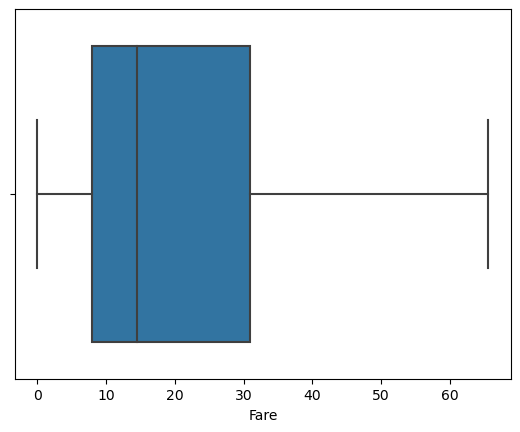

In [45]:
sns.boxplot(df.Fare)

# Cabin

In [46]:
df.Cabin.isnull().sum()

687

In [47]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [48]:
df.drop('Cabin',axis=1,inplace=True)

# Embarked

In [49]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

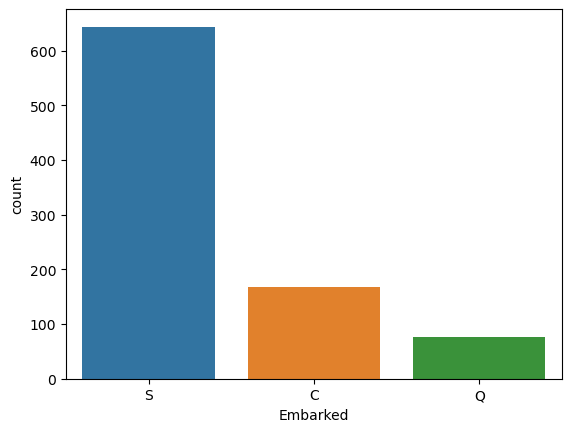

In [50]:
sns.countplot(df.Embarked)

In [51]:
numeric=df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]
numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1.0,0,7.2500
1,2,1,1,38.0,1.0,0,65.6344
2,3,1,3,26.0,0.0,0,7.9250
3,4,1,1,35.0,1.0,0,53.1000
4,5,0,3,35.0,0.0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0.0,0,13.0000
887,888,1,1,19.0,0.0,0,30.0000
888,889,0,3,28.0,1.0,2,23.4500
889,890,1,1,26.0,0.0,0,30.0000


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,8.0500,S


In [53]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


In [55]:
le=LabelEncoder()
df.Sex=le.fit_transform(df.Sex)

In [56]:
d=pd.get_dummies(df.Embarked,drop_first=True)

In [57]:
df=pd.concat([df,d],axis=1)

In [58]:
df.drop('Embarked',axis=1,inplace=True)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1.0,0,7.2500,0,1
1,1,1,0,38.0,1.0,0,65.6344,0,0
2,1,3,0,26.0,0.0,0,7.9250,0,1
3,1,1,0,35.0,1.0,0,53.1000,0,1
4,0,3,1,35.0,0.0,0,8.0500,0,1


In [60]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [61]:
#smote
zero=df[df.Survived==0]
one=df[df.Survived==1]

In [62]:
#resample
from sklearn.utils import resample

mali_over=resample(one,replace=True,n_samples=len(zero),random_state=27)


In [63]:
dfsmote=pd.concat([zero,mali_over])
dfsmote.Survived.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn. ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score,r2_score,accuracy_score


In [65]:
x = dfsmote.loc[:, df.columns != 'Survived']
y = dfsmote.loc[:, df.columns == 'Survived']

In [66]:
y.value_counts()

Survived
0           549
1           549
dtype: int64

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Random Forest

In [68]:
from sklearn import metrics

In [69]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

C:\Users\abhay\AppData\Local\Temp\ipykernel_15628\2148472383.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier()

In [73]:
params={
    'n_estimators':[100,200,300],
    'max_features':['sqrt',0.25]
}

In [74]:
gd=GridSearchCV(rf,params)

In [79]:
gd.fit(xtrain,ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'n_estimators': [100, 200, 300]})

In [80]:
fr=gd.best_estimator_

In [81]:
fr

RandomForestClassifier(max_features=0.25, n_estimators=200)

In [82]:
rf=RandomForestClassifier(n_estimators=200)

In [83]:
rf.fit(xtrain,ytrain)

C:\Users\abhay\AppData\Local\Temp\ipykernel_15628\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=200)

In [84]:
y_pred = rf.predict(xtest)

In [85]:
rf.score(xtest,ytest)

0.8772727272727273

In [86]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[98 17]
 [10 95]]


In [87]:
accuracy_score(ytest,y_pred)

0.8772727272727273

In [88]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       115
           1       0.85      0.90      0.88       105

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



In [89]:
#ROC
y_pred_prob = rf.predict_proba(xtest)
fpr, tpr, thresholds =roc_curve(ytest, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc) 

0.9551138716356107


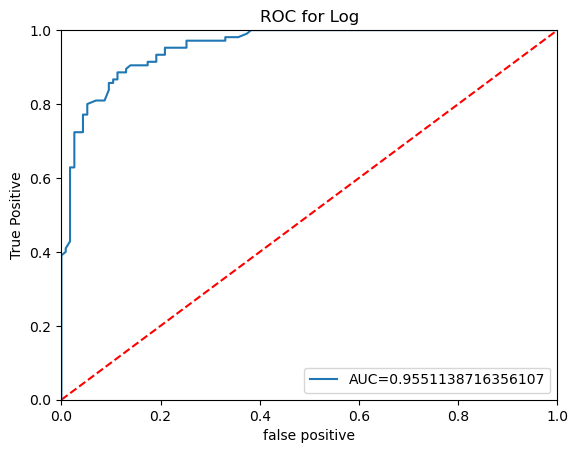

In [90]:
plt.title('ROC for Log')
plt.xlabel('false positive')
plt.ylabel('True Positive')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Knn

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [92]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [93]:
from sklearn.model_selection import cross_val_score


In [94]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the candidate values of k
for k in k_values:
    # Create a KNN regressor with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate the cross-validation score for the current value of k
    scores = cross_val_score(knn, x, y)

    # Append the mean of the cross-validation scores to the list of scores
    cv_scores.append(np.mean(scores))


C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [95]:
# Find the index of the best value of k based on the cross-validation scores
best_index = np.argmax(cv_scores)


In [96]:

# Print the best value of k
print("Best value of k:", k_values[best_index])

Best value of k: 1


# Logistic Regression

In [97]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y_pred=model.predict(xtest)

In [99]:
accuracy_score(ytest,y_pred)

0.7272727272727273

In [100]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[88 27]
 [33 72]]


In [101]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       115
           1       0.73      0.69      0.71       105

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.73      0.73      0.73       220



## Decision Tree

In [106]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [107]:
para={'max_depth':[10,20,30]}

In [114]:
gd=GridSearchCV(dt,para)

In [115]:
gd.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30]})

In [122]:
gd.best_estimator_

DecisionTreeClassifier(max_depth=20)

In [123]:
dt = DecisionTreeClassifier(max_depth=20)

In [125]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=20)

In [126]:
y_pred = dt.predict(xtest)

In [127]:
accuracy_score(ytest,y_pred)

0.8863636363636364

In [120]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[101  14]
 [ 11  94]]


In [121]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       115
           1       0.87      0.90      0.88       105

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220

